In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1)
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

import warnings
warnings.simplefilter("ignore")

In [50]:
COLORS = sns.color_palette()

In [46]:
def plot_bar(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20, 10), rotation=45):
    plot = df.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)

## 데이터 로드

In [2]:
retail = pd.read_csv('../../data/dataset/Online Retail Clean.csv')

## 데이터 탐색

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      397884 non-null  int64  
 1   StockCode      397884 non-null  object 
 2   Description    397884 non-null  object 
 3   Quantity       397884 non-null  int64  
 4   InvoiceDate    397884 non-null  object 
 5   UnitPrice      397884 non-null  float64
 6   CustomerID     397884 non-null  int64  
 7   Country        397884 non-null  object 
 8   checkoutPrice  397884 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 27.3+ MB


#### InvoiceDate 데이터 타입 변환

In [4]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [5]:
print(retail['InvoiceDate'].dtypes)

datetime64[ns]


In [6]:
retail.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


#### 해당 기간의 매출

- 전체 매출
- 국가별 매출
- 월별 매출
- 요일별 매출
- 시간별 매출

In [7]:
# 전체 매출
total_revenue = retail['checkoutPrice'].sum()
total_revenue

8911407.904

In [8]:
# 국가별 매출
revenue_by_countries = retail.groupby('Country')[['checkoutPrice']].sum().sort_values('checkoutPrice', ascending=False)
revenue_by_countries

,checkoutPrice
Country,
United Kingdom,7308391.554
Netherlands,285446.340
EIRE,265545.900
Germany,228867.140
France,209024.050
Australia,138521.310
Spain,61577.110
Switzerland,56443.950
Belgium,41196.340


Text(0.5, 1.0, 'Revenue By Country')

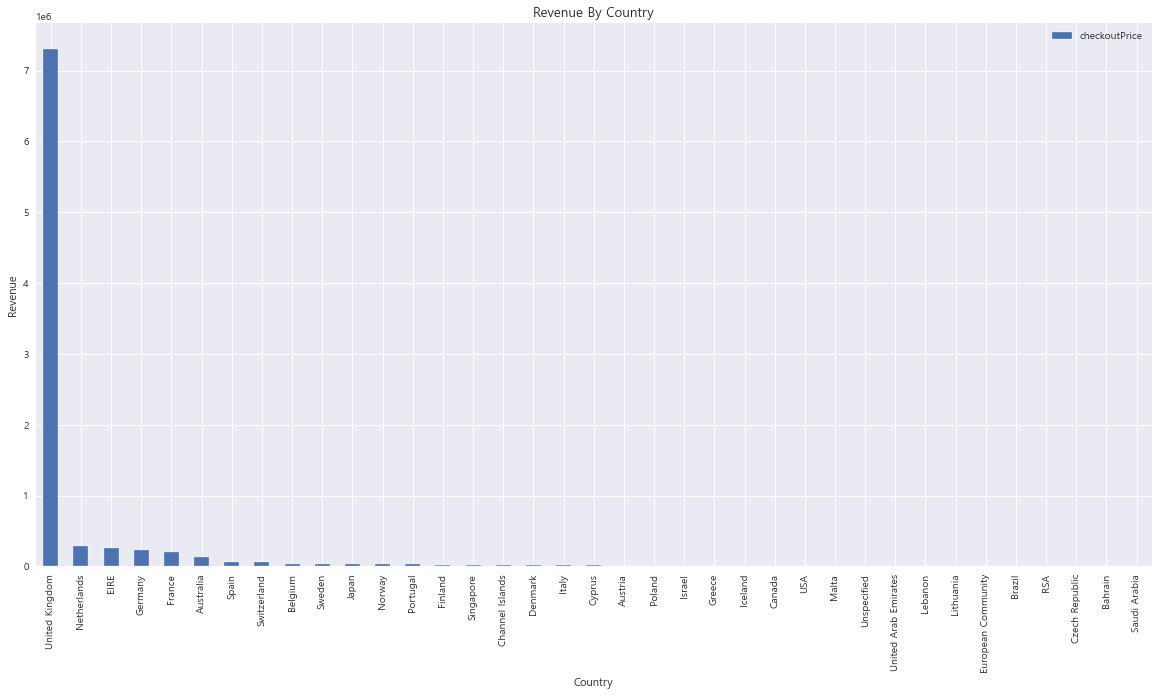

In [9]:
ax = revenue_by_countries.plot.bar(figsize=(20, 10))
ax.set_xlabel("Country", fontsize=11)
ax.set_ylabel("Revenue", fontsize=11)
ax.set_title("Revenue By Country", fontsize=13)

In [10]:
revenue_by_countries / total_revenue

,checkoutPrice
Country,
United Kingdom,0.820116
Netherlands,0.032032
EIRE,0.029798
Germany,0.025682
France,0.023456
Australia,0.015544
Spain,0.006910
Switzerland,0.006334
Belgium,0.004623


In [24]:
# 201001

def extract_month(date):
    month = str(date.month)
    
    if date.month < 10 :
        month = "0" + month
    return str(date.year) + month

In [27]:
# 월별 매출
revenue_by_month = retail.set_index("InvoiceDate").groupby(extract_month)[['checkoutPrice']].sum()
revenue_by_month

,checkoutPrice
InvoiceDate,
201012,572713.890
201101,569445.040
201102,447137.350
201103,595500.760
201104,469200.361
201105,678594.560
201106,661213.690
201107,600091.011
201108,645343.900


Text(0.5, 1.0, 'Revenue By Month')

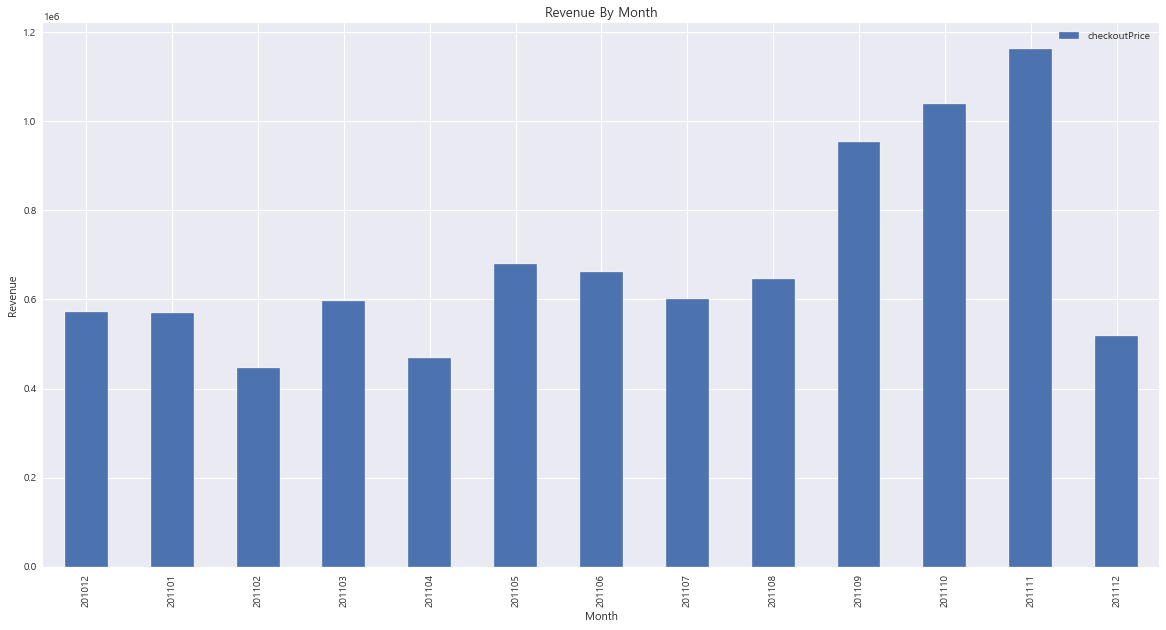

In [34]:
ax = revenue_by_month.plot.bar(figsize=(20, 10))
ax.set_xlabel("Month", fontsize=11)
ax.set_ylabel("Revenue", fontsize=11)
ax.set_title("Revenue By Month", fontsize=13)

In [49]:
# 요일별 매출
revenue_by_day_of_week = retail.set_index("InvoiceDate").groupby(lambda date:date.dayofweek)[['checkoutPrice']].sum()
revenue_by_day_of_week

,checkoutPrice
InvoiceDate,
0,1367146.411
1,1700634.631
2,1588336.170
3,1976859.070
4,1485917.401
6,792514.221


0 : Mon
1 : Tue
2 : Wed
3 : Thur
4 : Fri
5 : Sat
6 : Sun

In [51]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
revenue_by_day_of_week.index = DAY_OF_WEEK[revenue_by_day_of_week.index]

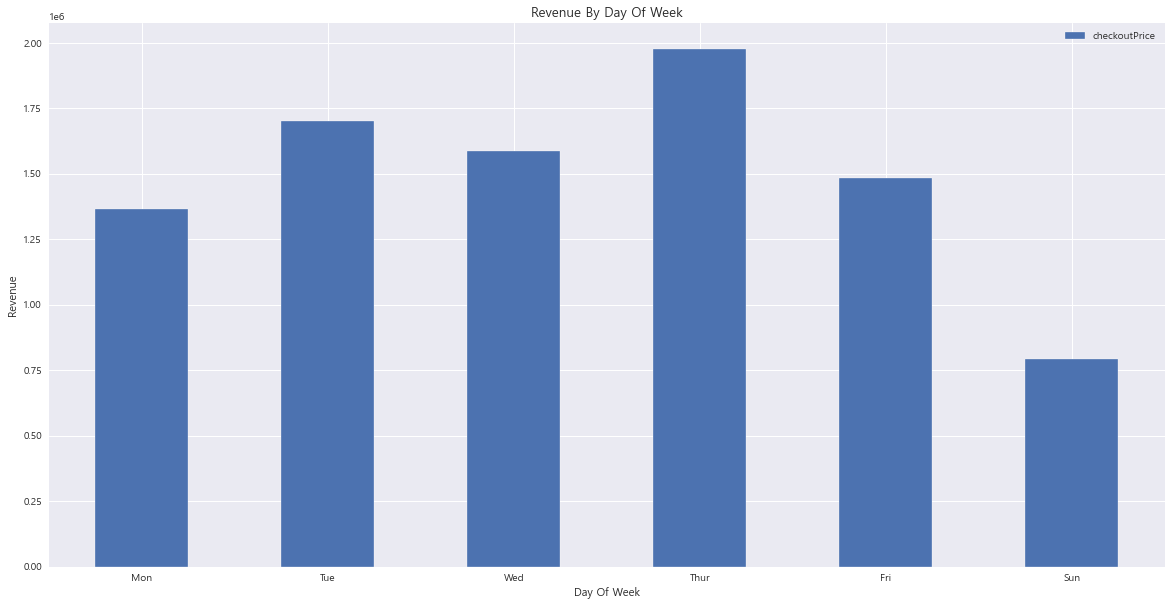

In [47]:
plot_bar(revenue_by_day_of_week, "Day Of Week", "Revenue", "Revenue By Day Of Week", rotation=0)

Text(0.5, 1.0, 'Revenue By Day Of Week')

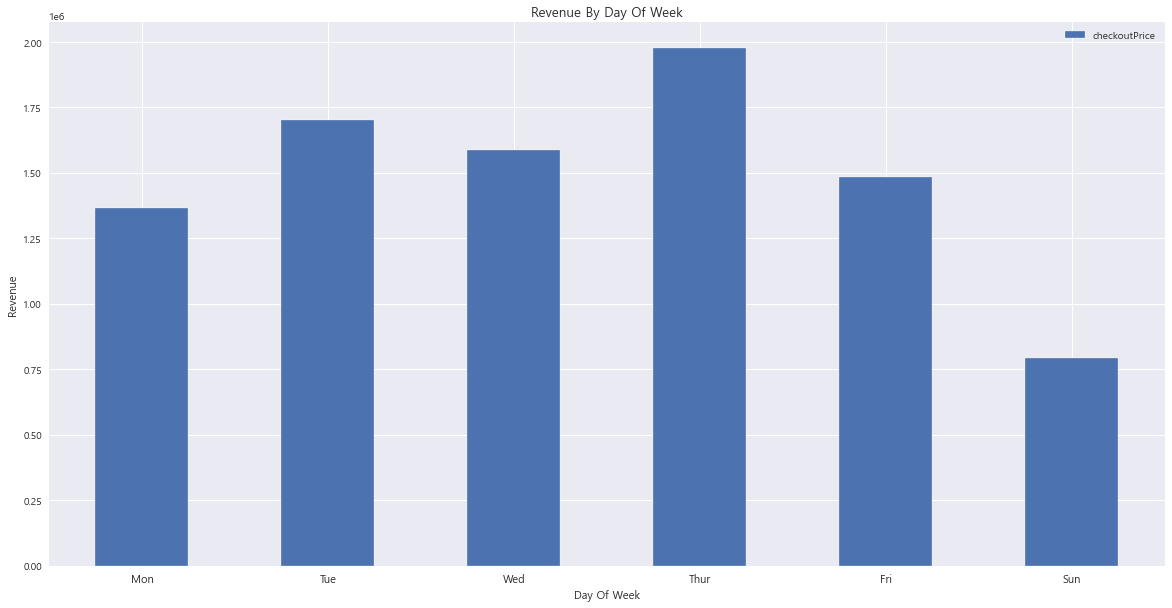

In [43]:
ax = revenue_by_day_of_week.plot.bar(figsize=(20, 10))
ax.set_xlabel("Day Of Week", fontsize=11)
ax.set_ylabel("Revenue", fontsize=11)
ax.set_xticklabels(labels=revenue_by_day_of_week.index, rotation=0, fontsize=11)
ax.set_title("Revenue By Day Of Week", fontsize=13)

In [52]:
revenue_by_hour = retail.set_index("InvoiceDate").groupby(lambda date:date.hour)[['checkoutPrice']].sum()
revenue_by_hour

,checkoutPrice
InvoiceDate,
6,4.250
7,31059.210
8,282115.630
9,842605.171
10,1261192.571
11,1104558.750
12,1378571.480
13,1173264.750
14,995629.371


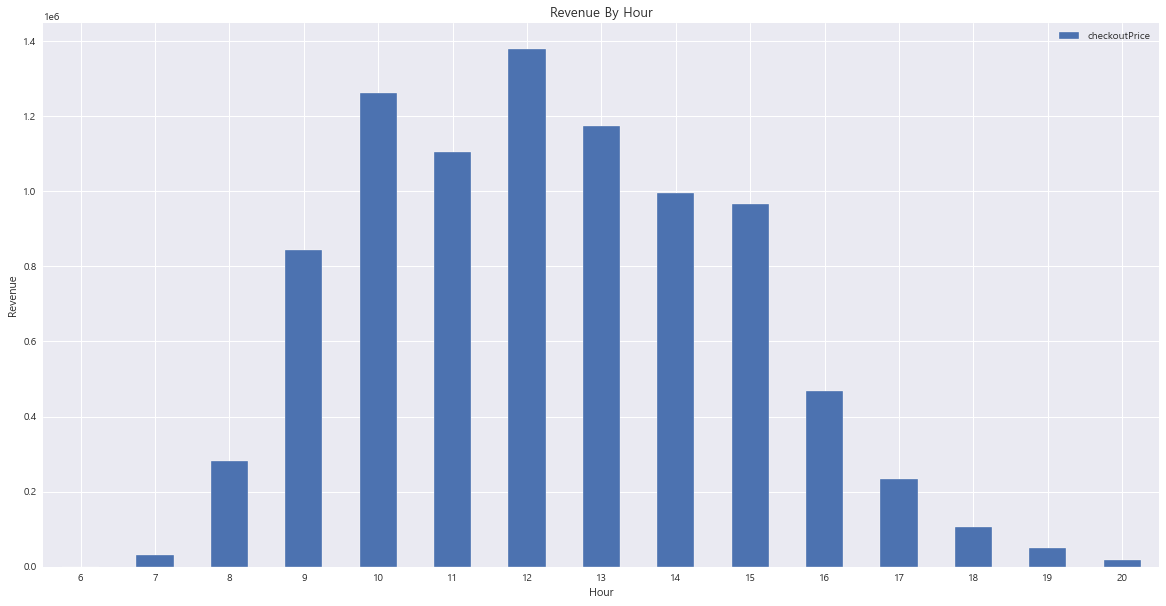

In [53]:
plot_bar(revenue_by_hour, "Hour", "Revenue", "Revenue By Hour", rotation=0)

### 매출 데이터로부터 insight

- 전체 매출액의 82 % 가 UK 에서 발생
- 2011년도의 가장 주문이 많이 발생한 달 11월(12월 전체데이터가 반영 X)
- 일주일 중 목요일까지는 증가세를 보이다, 이후로 하락
- 7 이후로 주문 시작되어 ,12시까지 증가세, 이후 하락세

### 제품

- Top 10 판매 제품 (Quantity)
- Top 10 매출 제품 (checkoutPrice)

In [60]:
retail.groupby("StockCode")['Quantity'].sum().sort_values(ascending=False)[:10]

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64

In [61]:
retail.groupby("StockCode")["checkoutPrice"].sum().sort_values(ascending=False)[:10]

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: checkoutPrice, dtype: float64

In [62]:
top3 = retail.groupby("StockCode")['Quantity'].sum().sort_values(ascending=False).head(3)

In [65]:
top3_group = retail.set_index('InvoiceDate').groupby(['StockCode', extract_month])[['Quantity', 'checkoutPrice']].sum()

In [67]:
top3_selling = top3_group.loc[top3.index]

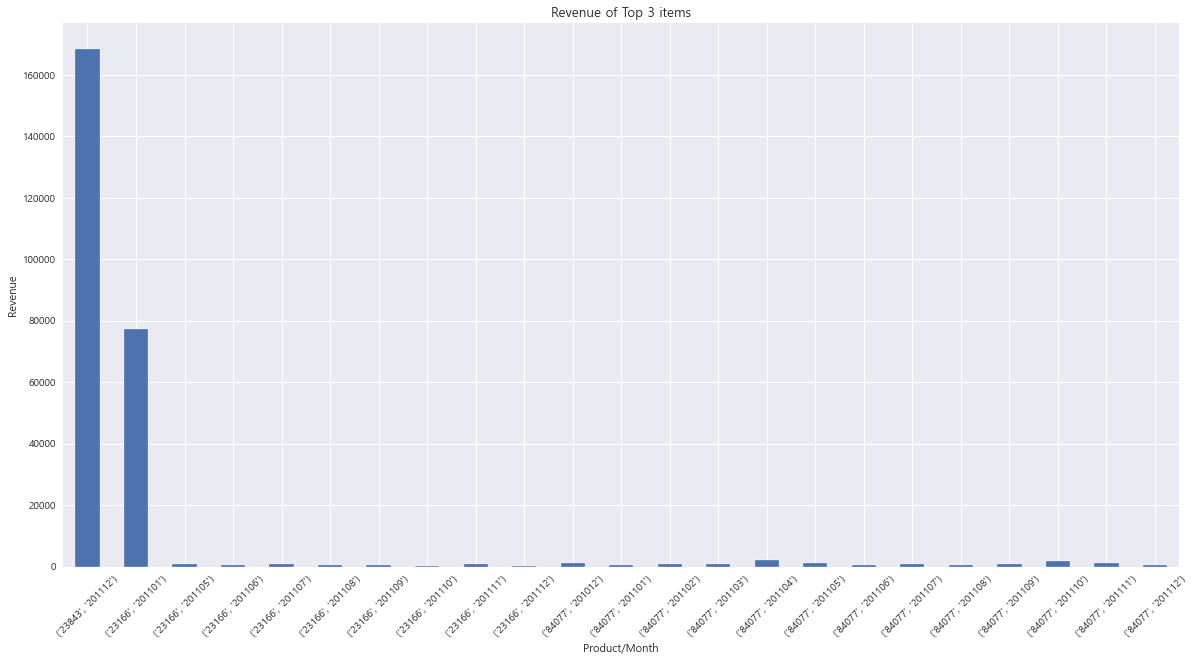

In [69]:
plot_bar(top3_selling['checkoutPrice'], 'Product/Month', 'Revenue', "Revenue of Top 3 items")